## Sampling Kernels

In [688]:
k_all = np.linspace(0,10,1000)
def iso_kernel(k,delta_k,ri_rj):
    return (spherical_jn(1,(k+delta_k/2)*ri_rj)*(k+delta_k/2)**2.-spherical_jn(1,(k-delta_k/2)*ri_rj)*(k-delta_k/2)**2.)/(k**2.*delta_k+(delta_k)**3./12.)/ri_rj
def thin_iso_kernel(k,ri_rj):
    return spherical_jn(0,k*ri_rj)

In [689]:
ri_rj_all = np.linspace(1,300,1000)

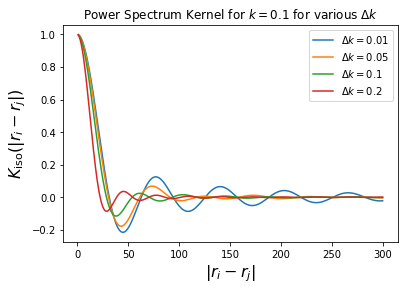

In [690]:
for delta_k in [0.01,0.05,0.1,0.2]:
    plt.plot(ri_rj_all,iso_kernel(0.1,delta_k,ri_rj_all),label=r'$\Delta k = %s$'%delta_k)
plt.title(r'Power Spectrum Kernel for $k=0.1$ for various $\Delta k$')
plt.ylabel(r'$K_\mathrm{iso}(|r_i-r_j|)$',fontsize=16);plt.xlabel(r'$|r_i-r_j|$',fontsize=16);plt.legend();

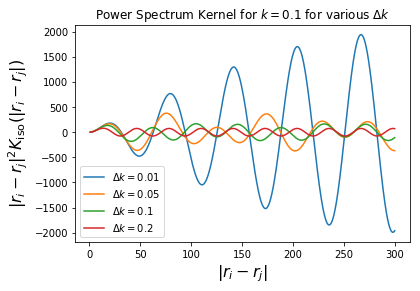

In [435]:
for delta_k in [0.01,0.05,0.1,0.2]:
    plt.plot(ri_rj_all,ri_rj_all**2.*iso_kernel(0.1,delta_k,ri_rj_all),label=r'$\Delta k = %s$'%delta_k)
plt.title(r'Power Spectrum Kernel for $k=0.1$ for various $\Delta k$')
plt.ylabel(r'$|r_i-r_j|^2 K_\mathrm{iso}(|r_i-r_j|)$',fontsize=16);plt.xlabel(r'$|r_i-r_j|$',fontsize=16);plt.legend();
#plt.ylim([-500,500]);

#### Consider integrated kernel up to some $R_\mathrm{max}$

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


Text(0.5,1,'Integrated Isotropic Kernel to various $R_\\mathrm{max}$')

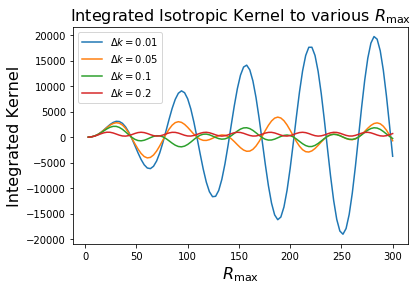

In [436]:
for k_width in [0.01,0.05,0.1,0.2]: 
    integrated_kernel = lambda x_max: quad(lambda x: x**2.*iso_kernel(0.1,k_width,x),0,x_max)

    all_x_max = np.linspace(0,300,100)
    all_integrated = [integrated_kernel(x_max)[0] for x_max in all_x_max]

    plt.plot(all_x_max,all_integrated,label=r'$\Delta k = %s$'%k_width)
plt.legend()
plt.ylabel('Integrated Kernel',fontsize=16);plt.xlabel(r'$R_\mathrm{max}$',fontsize=16);
plt.title(r'Integrated Isotropic Kernel to various $R_\mathrm{max}$',fontsize=16)

#### Now consider kernel function multiplied by $\xi$

In [580]:
xi_file = '/mnt/store1/oliverphilcox/Legendre2PCF/mean_xi.xi'
xi_model = np.loadtxt(xi_file,skiprows=2).mean(axis=1)
xi_r = np.genfromtxt(xi_file,max_rows=1)
r_max = max(xi_r)-20

from scipy.interpolate import UnivariateSpline
xi_fit = UnivariateSpline(xi_r,xi_model*xi_r**2.)
def xi_spline(r):
    if type(r)==float:
        if r<r_max:
            return xi_fit(r)/r**2.
        else:
            return xi_fit(r_max)/r_max**2./(r/r_max)**4.
    else:
        xi_out = np.zeros_like(r)
        filt = np.where(r<r_max)
        filt2 = np.where(r>=r_max)
        xi_out[filt] = xi_fit(r[filt])/(r[filt])**2.
        xi_out[filt2] = xi_fit(r_max)/r_max**2./(r[filt2]/r_max)**4.
        return xi_out
    
def xi_spline2(r):
    if type(r)==float:
        if r<r_max:
            return xi_fit(r)
        else:
            return xi_fit(r_max)*(r_max/r)**2.
    else:
        xi_out = np.zeros_like(r)
        filt = np.where(r<r_max)
        filt2 = np.where(r>=r_max)
        xi_out[filt] = xi_fit(r[filt])
        xi_out[filt2] = xi_fit(r_max)*(r_max/r[filt2]/r_max)**2.
        return xi_out

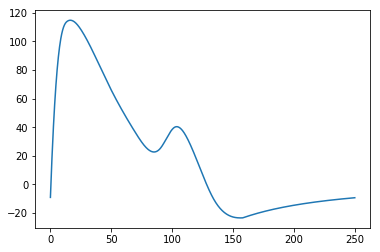

In [581]:
all_r = np.linspace(0.01,250,1000)
#all_xi = [xi_spline(r) for r in all_r]
plt.plot(all_r,all_r**2.*xi_spline(all_r))

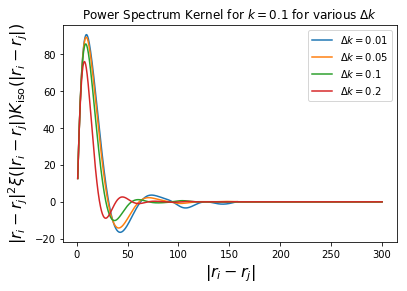

In [582]:
for delta_k in [0.01,0.05,0.1,0.2]:
    plt.plot(ri_rj_all,xi_spline2(ri_rj_all)*iso_kernel(0.1,delta_k,ri_rj_all),label=r'$\Delta k = %s$'%delta_k)
plt.title(r'Power Spectrum Kernel for $k=0.1$ for various $\Delta k$')
plt.ylabel(r'$|r_i-r_j|^2 \xi(|r_i-r_j|)K_\mathrm{iso}(|r_i-r_j|)$',fontsize=16);plt.xlabel(r'$|r_i-r_j|$',fontsize=16);plt.legend();
#plt.ylim([-500,500]);

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


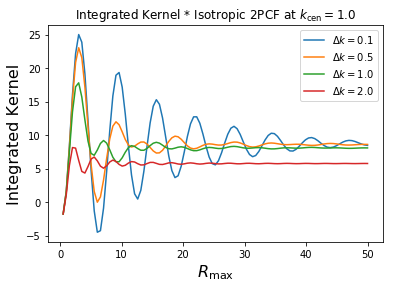

In [583]:
k_cen = 1.
for k_width in np.asarray([0.1,0.5,1.,2.])*k_cen: 
    integrated_kernel = lambda x_max: quad(lambda x: xi_spline2(x)*iso_kernel(k_cen,k_width,x),0,x_max)

    all_x_max = np.linspace(0,50,100)
    all_integrated = [integrated_kernel(x_max)[0] for x_max in all_x_max]

    plt.plot(all_x_max,all_integrated,label=r'$\Delta k = %s$'%k_width)
plt.legend()
plt.title(r'Integrated Kernel * Isotropic 2PCF at $k_\mathrm{cen} = %s$'%k_cen)
plt.ylabel('Integrated Kernel',fontsize=16);plt.xlabel(r'$R_\mathrm{max}$',fontsize=16);

#### Integrated Kernels for all $k$

Compute the fractional error as a function of $k$

In [530]:
def iso_kernel_maxmin(min_k,max_k,ri_rj):
    return (spherical_jn(1,(max_k)*ri_rj)*max_k**2.-spherical_jn(1,(min_k)*ri_rj)*min_k**2.)*3./(max_k**3.-min_k**3.)/ri_rj


In [587]:
def integrated_kernel(min_k,max_k,R_max):
    int_func = lambda x: xi_spline2(x)*iso_kernel_maxmin(min_k,max_k,x)
    tmp_int = quad(int_func,0,R_max)
    return tmp_int[0]

#### Look at Truncation Error across $k$-space

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


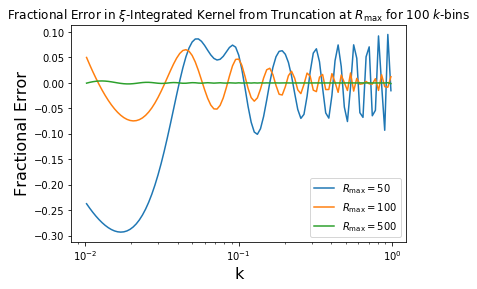

In [588]:
n_k = 100
k_tmp = np.logspace(np.log10(0.01),np.log10(1.),n_k)
k_min = k_tmp[:-1]
k_max = k_tmp[1:]
k_cen = 0.5*(k_min+k_max)

for R_max in [50,100,500]:
    all_integrated = np.asarray([integrated_kernel(k_min[ki],k_max[ki],R_max) for ki in range(len(k_cen))])
    max_integrated = np.asarray([integrated_kernel(k_min[ki],k_max[ki],10000) for ki in range(len(k_cen))])
    plt.plot(k_cen,(all_integrated-max_integrated)/max_integrated,label=r'$R_\mathrm{max} = %d$'%R_max)
plt.xscale('log')
plt.legend();
plt.ylabel('Fractional Error',fontsize=16);plt.xlabel('k',fontsize=16);
plt.title(r'Fractional Error in $\xi$-Integrated Kernel from Truncation at $R_\mathrm{max}$ for %d $k$-bins'%n_k);

#### Consider Thin-Bin Limit

In [585]:
def integrated_kernel_thin(k_cen,R_max):
    int_func = lambda x: xi_spline2(x)*np.sin(k_cen*x)/x
    tmp_int = quad(int_func,0,R_max)
    return tmp_int[0]

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


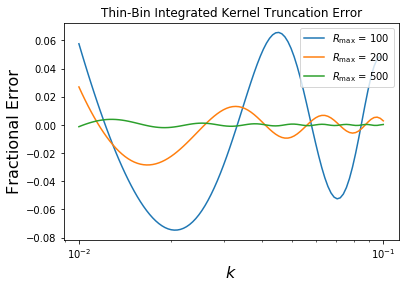

In [627]:
k_cen = np.logspace(-2,-1,100)
max_ints = np.asarray([integrated_kernel_thin(kk,10000) for kk in k_cen])
for R_max in [100,200,500]:
    all_ints = np.asarray([integrated_kernel_thin(kk,R_max) for kk in k_cen])
    plt.plot(k_cen,(all_ints-max_ints)/max_ints,label=r'$R_\mathrm{max}$ = %d'%R_max)
plt.xscale('log');
plt.ylabel('Fractional Error',fontsize=16)
plt.xlabel(r'$k$',fontsize=16);
plt.title('Thin-Bin Integrated Kernel Truncation Error');
plt.legend();

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


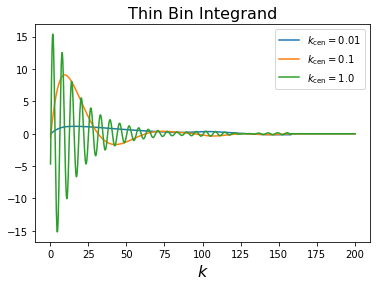

In [633]:
for k_cen in [0.01,0.1,1.]:
    x = np.linspace(0,200,1000)
    plt.plot(x,xi_spline2(x)*np.sin(k_cen*x)/x,label=r'$k_\mathrm{cen} = %s$'%k_cen)
plt.legend();
plt.title('Thin Bin Integrand',fontsize=16);plt.xlabel(r'$k$',fontsize=16);

In [600]:
def integrated_kernel_thin(k_cen,R_max,window = lambda x: 1):
    int_func = lambda x: xi_spline2(x)*np.sin(k_cen*x)/x*window(x)
    tmp_int = quad(int_func,0,R_max)
    return tmp_int[0]

In [635]:
k_cen = np.logspace(-2,-1,100)
R_max = 200
top_hat_int = np.asarray([integrated_kernel_thin(kk,R_max) for kk in k_cen])
top_hat_max = np.asarray([integrated_kernel_thin(kk,1000) for kk in k_cen])
top_hat_diff = (top_hat_int-top_hat_max)/top_hat_max

In [685]:
def windower(x,R_max=1000):
    f=0.2
    if x>f*R_max and x<R_max:
        return np.cos((x-f*R_max)*np.pi/(2.*(1.-f)*R_max))
    elif x>R_max:
        return 0.
    else:
        return 1.
def windower2(x,R_max=1000):
    f=0.5
    if x>f*R_max and x<R_max:
        return 1.-(x-f*R_max)/((1.-f)*R_max)
    elif x>R_max:
        return 0.
    else:
        return 1.
    #./x#(R_max-x)/R_max

windowed_int = np.asarray([integrated_kernel_thin(kk,R_max,lambda x: windower(x,R_max=R_max)) for kk in k_cen])
windowed_max = np.asarray([integrated_kernel_thin(kk,1000,lambda x: windower(x)) for kk in k_cen])
windowed_diff = (windowed_int-windowed_max)/windowed_max

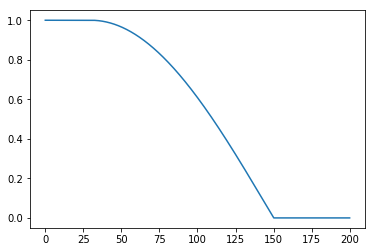

In [686]:
ww=[windower(xx,150) for xx in x]
plt.plot(x,ww)

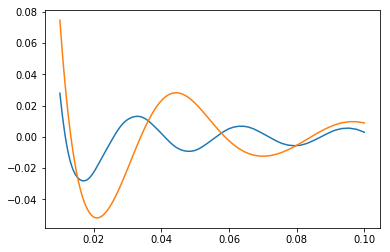

In [687]:
plt.plot(k_cen,top_hat_diff)
plt.plot(k_cen,windowed_diff)

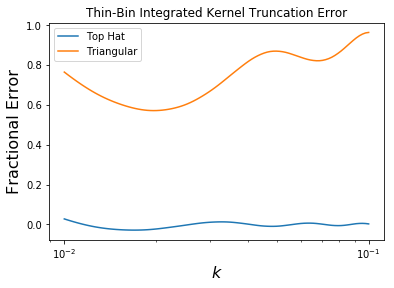

In [613]:
this_int = [top_hat_int,triangular_int]
names = ['Top Hat','Triangular']
for i in range(len(names)):
    plt.plot(k_cen,(this_int[i]-max_ints)/max_ints,label=r'%s'%names[i])
plt.xscale('log');
plt.ylabel('Fractional Error',fontsize=16)
plt.xlabel(r'$k$',fontsize=16);
plt.title('Thin-Bin Integrated Kernel Truncation Error');
plt.legend();

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


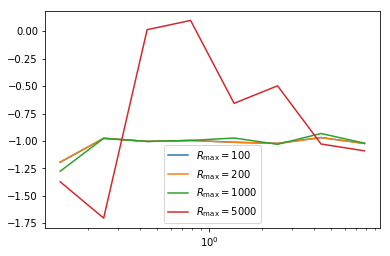

In [443]:
k_tmp = np.logspace(-1,1,9)
k_min = k_tmp[:-1]
k_max = k_tmp[1:]
k_cen = 0.5*(k_min+k_max)

R_max = 10000
for this_R in [100,200,1000,5000]:
    frac_err = []
    for k_i in range(len(k_min)):    
        this_integrated=quad(lambda x: xi_fit(x)*iso_kernel_maxmin(k_min[k_i],k_max[k_i],x),0,this_R)[0]
        true_integrated=quad(lambda x: xi_fit(x)*iso_kernel_maxmin(k_min[k_i],k_max[k_i],x),0,R_max)[0]
        frac_err.append((this_integrated-true_integrated)/true_integrated)
    plt.plot(k_cen,frac_err,label=r'$R_\mathrm{max} = %d$'%this_R);
plt.legend();
plt.xscale('log');

In [ ]:
xi_fit(x)*iso_kernel_maxmin

In [401]:
integrated_kernel

<function __main__.<lambda>(x)>

In [ ]:
k_cen = 1.
for k_width in np.asarray([0.1,0.5,1.,2.])*k_cen: 
    integrated_kernel = lambda x_max: quad(lambda x: xi_fit(x)*iso_kernel(k_cen,k_width,x),0,x_max)

    all_x_max = np.linspace(0,100,100)
    all_integrated = [integrated_kernel(x_max)[0] for x_max in all_x_max]

    plt.plot(all_x_max,all_integrated,label=r'$\Delta k = %s$'%k_width)
plt.legend()
plt.title(r'Integrated Kernel * Isotropic 2PCF at $k_\mathrm{cen} = %s$'%k_cen)
plt.ylabel('Integrated Kernel',fontsize=16);plt.xlabel(r'$R_\mathrm{max}$',fontsize=16);

Plot truncation errors as a function of max_r

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


(5, -5)

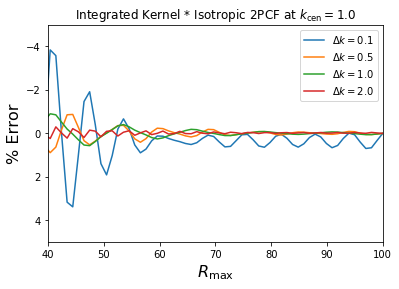

In [386]:
k_cen = 1.
for k_width in np.asarray([0.1,0.5,1.,2.])*k_cen: 
    integrated_kernel = lambda x_max: quad(lambda x: xi_fit(x)*iso_kernel(k_cen,k_width,x),0,x_max)
    
    all_x_max = np.linspace(0,100,100)
    all_integrated = np.asarray([integrated_kernel(x_max)[0] for x_max in all_x_max])

    true_integrated = all_integrated[-1]

    plt.plot(all_x_max,(all_integrated-true_integrated)/true_integrated*100.,label=r'$\Delta k = %s$'%k_width)
    
plt.legend()
plt.title(r'Integrated Kernel * Isotropic 2PCF at $k_\mathrm{cen} = %s$'%k_cen)
plt.ylabel('% Error',fontsize=16);plt.xlabel(r'$R_\mathrm{max}$',fontsize=16);
plt.xlim([40,100]);
plt.ylim([5,-5])

## Compare True vs Computed Powers

#### Compute true power in bin from FT:

In [296]:
def true_power(min_k,max_k,R_max):
    from scipy.integrate import dblquad
    integrator = lambda k,x: xi_spline(x)*x*k*np.sin(k*x)
    output=dblquad(integrator,0,R_max,min_k,max_k)[0]
    return output

In [300]:
true_power(0.1,0.2,10000)

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


55.80722068808748

In [372]:
from hankel import HankelTransform     # Import the basic class

ht = HankelTransform(nu= 0,N = 120,h = 0.01)

In [373]:
transforms=[]
k_range = np.logspace(-4,0,100)
for k in k_range:
    transforms.append(ht.transform(xi_spline,k)[0])

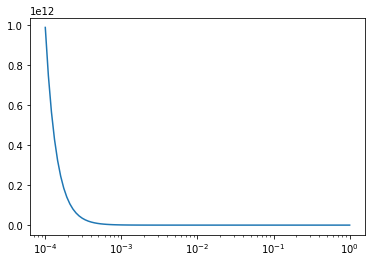

In [374]:
plt.plot(k_range,transforms)
plt.xscale('log')

In [348]:
def true_power(min_k,max_k):
    from scipy.integrate import quad
    integrator = lambda k: ht.transform(xi_spline,k)[0]*k**2.
    output=quad(integrator,min_k,max_k)[0]*12.*np.pi/(max_k**3.-min_k**3.)
    return output

In [349]:
true_power(0.1,0.2)

-2438.5527827569276

In [293]:
output

(1.4971855193239112, 2.0727422153080678e-08)

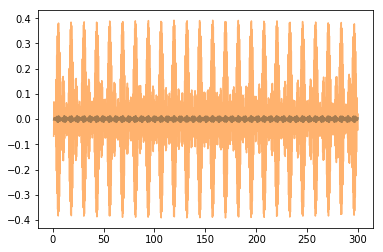

In [174]:
plt.plot(ri_rj_all,ri_rj_all**2.*iso_kernel(10.,5,ri_rj_all))#;plt.yscale('log');plt.xscale('log');
plt.plot(ri_rj_all,ri_rj_all**2.*iso_kernel(10.,0.5,ri_rj_all),alpha=0.6)#;plt.yscale('log');plt.xscale('log');
#plt.plot(ri_rj_all,ri_rj_all**2.*thin_iso_kernel(1.,ri_rj_all))